IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

IMPORTING DATASET

In [3]:
df=pd.read_csv("/content/stress.csv")
df

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.800000,1521614353,5.0,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1.0,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.000000,1527009817,4.0,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2.0,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.800000,1535935605,2.0,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0.0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.600000,1516429555,0.0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5.0,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.800000,1539809005,24.0,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1.0,7.910952,-0.204167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,ptsd,8u4olb,"(10, 15)","His mom came, he freaked out and got angry. He...",27516,0,0.800000,1530055048,16.0,5.842065,...,1.000,1.1429,1.0,1.75078,1.77000,1.73147,0.93,73.0,5.822957,-0.500000
1094,almosthomeless,94uaui,"[10, 15]",They took me to a Bar and bought me a beer.. ‘...,1393,0,0.571429,1533496123,78.0,3.985806,...,1.000,1.0000,1.0,1.62125,1.72688,1.91314,0.94,3.0,4.989279,-0.066667
1095,anxiety,8d2b2z,"[0, 5]",It's something that I continually come back to...,1818,0,0.800000,1524018866,11.0,9.520326,...,1.000,1.0000,1.0,1.76204,1.51892,1.80307,1.00,4.0,10.089586,0.016047
1096,assistance,764xo3,"(0, 5)",My mom is living on borrowed time and she need...,11122,1,1.000000,1507903006,60.0,4.463333,...,1.000,1.1818,1.0,1.79511,1.57353,1.86075,0.90,0.0,5.004543,0.144444


DATA EXPLORATION

In [4]:
df.shape

(1098, 116)

In [5]:
df.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [6]:
df.dtypes

subreddit                    object
post_id                      object
sentence_range               object
text                         object
id                            int64
                             ...   
lex_dal_avg_pleasantness    float64
social_upvote_ratio         float64
social_num_comments         float64
syntax_fk_grade             float64
sentiment                   float64
Length: 116, dtype: object

In [7]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5.0,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1.0,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4.0,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2.0,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2.0,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0.0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0.0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5.0,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24.0,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1.0,7.910952,-0.204167


In [8]:
df.tail()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
1093,ptsd,8u4olb,"(10, 15)","His mom came, he freaked out and got angry. He...",27516,0,0.800000,1530055048,16.0,5.842065,...,1.0,1.1429,1.0,1.75078,1.77000,1.73147,0.93,73.0,5.822957,-0.500000
1094,almosthomeless,94uaui,"[10, 15]",They took me to a Bar and bought me a beer.. ‘...,1393,0,0.571429,1533496123,78.0,3.985806,...,1.0,1.0000,1.0,1.62125,1.72688,1.91314,0.94,3.0,4.989279,-0.066667
1095,anxiety,8d2b2z,"[0, 5]",It's something that I continually come back to...,1818,0,0.800000,1524018866,11.0,9.520326,...,1.0,1.0000,1.0,1.76204,1.51892,1.80307,1.00,4.0,10.089586,0.016047
1096,assistance,764xo3,"(0, 5)",My mom is living on borrowed time and she need...,11122,1,1.000000,1507903006,60.0,4.463333,...,1.0,1.1818,1.0,1.79511,1.57353,1.86075,0.90,0.0,5.004543,0.144444
1097,survivorsofabuse,7gxpn8,"(87, 92)",I am 26 but I have many years ahead of me stil...,5001,0,1.000000,1512159284,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**CONCLUSION: we actually only need columns text and label for stress detection nlp modelling**

In [9]:
df=df[['text','label']]
df

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
1093,"His mom came, he freaked out and got angry. He...",0
1094,They took me to a Bar and bought me a beer.. ‘...,0
1095,It's something that I continually come back to...,0
1096,My mom is living on borrowed time and she need...,1


**DATA WRANGLING**

In [10]:
# MISSING VALUES
df.isna().sum()

text     0
label    0
dtype: int64

In [11]:
# DUPLICATE VALUES
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace=True)
df

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
1093,"His mom came, he freaked out and got angry. He...",0
1094,They took me to a Bar and bought me a beer.. ‘...,0
1095,It's something that I continually come back to...,0
1096,My mom is living on borrowed time and she need...,1


In [13]:
# CORRECTING THE INDEX VALUE
df.reset_index(drop=True,inplace=True)
df

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
1092,"His mom came, he freaked out and got angry. He...",0
1093,They took me to a Bar and bought me a beer.. ‘...,0
1094,It's something that I continually come back to...,0
1095,My mom is living on borrowed time and she need...,1


DATA ANALYSIS

In [14]:
# OBSERVING THE OUTPUT LABEL
df['label'].value_counts()

1    568
0    529
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

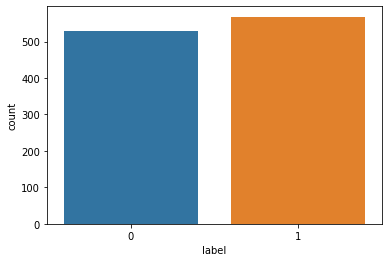

In [15]:
sns.countplot(x='label',data=df)

In [16]:
# MAPPING COLUMN LABEL
df['label']=df['label'].map({0:'NO STRESS',1:'STRESS'})
df

,text,label
0,"He said he had not felt that way before, sugge...",STRESS
1,"Hey there r/assistance, Not sure if this is th...",NO STRESS
2,My mom then hit me with the newspaper and it s...,STRESS
3,"until i met my new boyfriend, he is amazing, h...",STRESS
4,October is Domestic Violence Awareness Month a...,STRESS
...,...,...
1092,"His mom came, he freaked out and got angry. He...",NO STRESS
1093,They took me to a Bar and bought me a beer.. ‘...,NO STRESS
1094,It's something that I continually come back to...,NO STRESS
1095,My mom is living on borrowed time and she need...,STRESS


DOWNLOADING PACKAGES FOR NLP

In [17]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

NLP PREPROCESSING

In [18]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
import re
from nltk import word_tokenize
from nltk import SnowballStemmer
snow=SnowballStemmer('english')
from nltk.corpus import stopwords
stop=stopwords.words('english')

In [19]:
def nlp(text):
  text=str(text).lower()
  text=re.sub('[^a-zA-Z0-9]+',' ',text)
  text=[words for words in text.split(' ') if len(words)>=3]
  text=' '.join(text)
  text=[words for words in text.split(' ') if words not in stop]
  text=' '.join(text)
  text=[snow.stem(word) for word in text.split(" ")]
  text=' '.join(text)
  return text 

In [20]:
df['text']=df['text'].apply(nlp)
df

,text,label
0,said felt way sugget rest trigger ahead youi h...,STRESS
1,hey assist sure right place post goe current s...,NO STRESS
2,mom hit newspap shock would know like play hit...,STRESS
3,met new boyfriend amaz kind sweet good student...,STRESS
4,octob domest violenc awar month domest violenc...,STRESS
...,...,...
1092,mom came freak got angri almost slam door mom ...,NO STRESS
1093,took bar bought beer tonight sleep mime sleep ...,NO STRESS
1094,someth continu come back think anxieti manifes...,NO STRESS
1095,mom live borrow time need cardiac surgeri whol...,STRESS


In [21]:
# VECTORIZATION
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(df.text)
print(train_data)

  (0, 2083)	0.09803824803511313
  (0, 3103)	0.10598983379531493
  (0, 1954)	0.08273881617563474
  (0, 1990)	0.11408643280103052
  (0, 4716)	0.10041241120759288
  (0, 1837)	0.17857090176966361
  (0, 4314)	0.12356135176957204
  (0, 3262)	0.1686634996498786
  (0, 2918)	0.06781837355304687
  (0, 204)	0.17857090176966361
  (0, 1982)	0.10934229657185789
  (0, 4524)	0.1517266838581468
  (0, 2182)	0.1686634996498786
  (0, 3686)	0.12230801755317774
  (0, 3373)	0.09803824803511313
  (0, 1423)	0.09276748236639656
  (0, 3550)	0.12933743122512456
  (0, 2401)	0.1369159614924429
  (0, 1480)	0.06729846755308619
  (0, 974)	0.07695000701927272
  (0, 3873)	0.07812309597421503
  (0, 190)	0.12230801755317774
  (0, 2820)	0.09276748236639656
  (0, 4212)	0.13102324859276235
  (0, 3283)	0.17857090176966361
  :	:
  (1096, 3895)	0.1703598603578534
  (1096, 1706)	0.1556323268713743
  (1096, 2198)	0.15684456316347392
  (1096, 3141)	0.1319377968185832
  (1096, 3293)	0.1787368800311366
  (1096, 2827)	0.2662567627781

SEPERATING INPUT AND OUTPUT

In [22]:
x=train_data
y=df['label'].values

SEPERATING TRAINING AND TESTING DATA

In [23]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [24]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(767, 4771) (330, 4771) (767,) (330,)


MODEL CREATION AND PERFORMANCE EVALUATION

In [25]:
# CLASSIFICATION MODEL
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay

KNN CLASSIFIER
CONFUSION MATRIX:
 [[ 67  87]
 [ 48 128]]
ACCURACY SCORE: 0.5909090909090909
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

   NO STRESS       0.58      0.44      0.50       154
      STRESS       0.60      0.73      0.65       176

    accuracy                           0.59       330
   macro avg       0.59      0.58      0.58       330
weighted avg       0.59      0.59      0.58       330



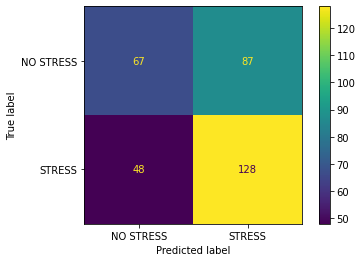

In [27]:
print("KNN CLASSIFIER")
model_knn=KNeighborsClassifier()
model_knn.fit(x_train,y_train)
y_knn=model_knn.predict(x_test)
print("CONFUSION MATRIX:\n",confusion_matrix(y_test,y_knn))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_knn))
print("ACCURACY SCORE:",accuracy_score(y_test,y_knn))
print("CLASSIFICATION REPORT:\n",classification_report(y_test,y_knn))

NAIVE-BAYES
CONFUSION MATRIX:
 [[ 60  94]
 [ 21 155]]
ACCURACY SCORE: 0.6515151515151515
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

   NO STRESS       0.74      0.39      0.51       154
      STRESS       0.62      0.88      0.73       176

    accuracy                           0.65       330
   macro avg       0.68      0.64      0.62       330
weighted avg       0.68      0.65      0.63       330



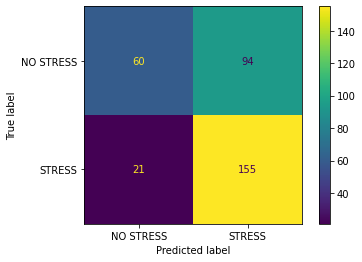

In [28]:
print("NAIVE-BAYES")
model_nb=MultinomialNB()
model_nb.fit(x_train,y_train)
y_nb=model_nb.predict(x_test)
print("CONFUSION MATRIX:\n",confusion_matrix(y_test,y_nb))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_nb))
print("ACCURACY SCORE:",accuracy_score(y_test,y_nb))
print("CLASSIFICATION REPORT:\n",classification_report(y_test,y_nb))

SUPPORT VECTOR
CONFUSION MATRIX:
 [[108  46]
 [ 52 124]]
ACCURACY SCORE: 0.703030303030303
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

   NO STRESS       0.68      0.70      0.69       154
      STRESS       0.73      0.70      0.72       176

    accuracy                           0.70       330
   macro avg       0.70      0.70      0.70       330
weighted avg       0.70      0.70      0.70       330



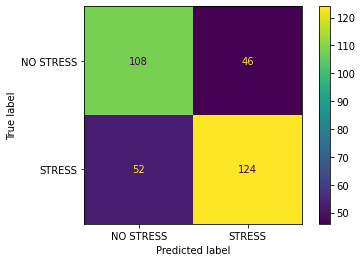

In [29]:
print("SUPPORT VECTOR")
model_svm=SVC()
model_svm.fit(x_train,y_train)
y_svm=model_svm.predict(x_test)
print("CONFUSION MATRIX:\n",confusion_matrix(y_test,y_svm))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_svm))
print("ACCURACY SCORE:",accuracy_score(y_test,y_svm))
print("CLASSIFICATION REPORT:\n",classification_report(y_test,y_svm))

DECISION TREE
CONFUSION MATRIX:
 [[102  52]
 [ 84  92]]
ACCURACY SCORE: 0.5878787878787879
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

   NO STRESS       0.55      0.66      0.60       154
      STRESS       0.64      0.52      0.57       176

    accuracy                           0.59       330
   macro avg       0.59      0.59      0.59       330
weighted avg       0.60      0.59      0.59       330



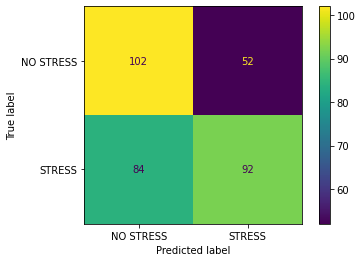

In [30]:
print("DECISION TREE")
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
y_dt=model_dt.predict(x_test)
print("CONFUSION MATRIX:\n",confusion_matrix(y_test,y_dt))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_dt))
print("ACCURACY SCORE:",accuracy_score(y_test,y_dt))
print("CLASSIFICATION REPORT:\n",classification_report(y_test,y_dt))

RANDOM FOREST
CONFUSION MATRIX:
 [[ 99  55]
 [ 42 134]]
ACCURACY SCORE: 0.706060606060606
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

   NO STRESS       0.70      0.64      0.67       154
      STRESS       0.71      0.76      0.73       176

    accuracy                           0.71       330
   macro avg       0.71      0.70      0.70       330
weighted avg       0.71      0.71      0.70       330



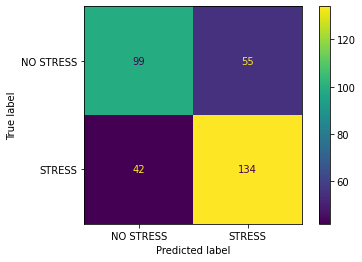

In [31]:
print("RANDOM FOREST")
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)
y_rf=model_rf.predict(x_test)
print("CONFUSION MATRIX:\n",confusion_matrix(y_test,y_rf))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_rf))
print("ACCURACY SCORE:",accuracy_score(y_test,y_rf))
print("CLASSIFICATION REPORT:\n",classification_report(y_test,y_rf))

In [32]:
# COMPARING THE ACCURACY SCORES OF ALL THE CLASSIFIERS
lst=[model_knn,model_nb,model_svm,model_dt,model_rf]
model=['KNN','NB','SVM','DECISION TREE','RANDOM FOREST']
lst_acc=[]
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  lst_acc.append(accuracy_score(y_test,y_pred))

acc_df=pd.DataFrame({'ALGORITHM':model,'ACCURACY_SCORE':lst_acc})
acc_df.sort_values(by='ACCURACY_SCORE',ascending=False,inplace=True)
acc_df

,ALGORITHM,ACCURACY_SCORE
2,SVM,0.703030
4,RANDOM FOREST,0.703030
1,NB,0.651515
3,DECISION TREE,0.621212
0,KNN,0.590909


<Axes: xlabel='ALGORITHM', ylabel='ACCURACY_SCORE'>

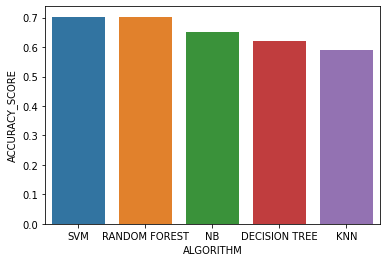

In [33]:
sns.barplot(x='ALGORITHM',y='ACCURACY_SCORE',data=acc_df)

**FINAL VERIFICATION WITH SVM: using input text from online users**

In [37]:
person1=input('ENTER THE TEXT:')
data=vec.transform([person1]).toarray()

ENTER THE TEXT:I AM HAPPY


In [38]:
y_out=model_svm.predict(data)
print(y_out)

['NO STRESS']


In [40]:
person2=input('ENTER THE TEXT:')
data1=vec.transform([person2]).toarray()

ENTER THE TEXT:I FEEL LIKE CRYING 


In [41]:
y_out1=model_svm.predict(data1)
print(y_out1)

['STRESS']
